/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode: 0, Total Reward: 10.0
Episode: 100, Total Reward: 17.0
Episode: 200, Total Reward: 16.0
Episode: 300, Total Reward: 21.0
Episode: 400, Total Reward: 17.0
Episode: 500, Total Reward: 21.0
Episode: 600, Total Reward: 14.0
Episode: 700, Total Reward: 9.0
Episode: 800, Total Reward: 10.0
Episode: 900, Total Reward: 13.0


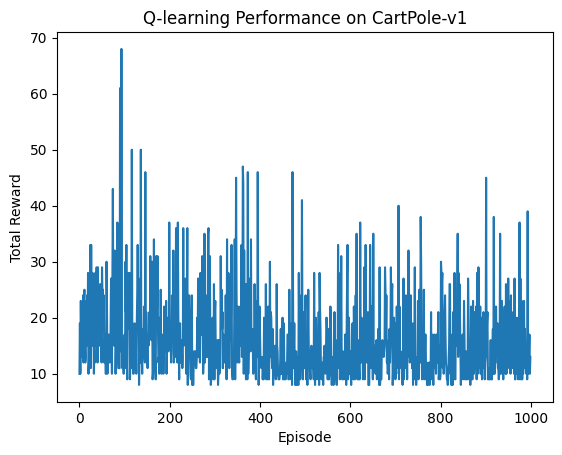

In [ ]:
import gym
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Initialize environment and hyperparameters
env = gym.make("CartPole-v1")
lr = 0.1              # Learning rate
discount = 0.99       # Discount factor
eps = 1.0             # Starting epsilon (exploration rate)
eps_decay = 0.995     # Epsilon decay rate
eps_min = 0.01        # Minimum epsilon
episodes = 1000       # Total training episodes
steps = 100           # Max steps per episode

# Define bins for discretizing the continuous state space
bins = [20, 20, 50, 50]
low = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -math.radians(50)]
high = [env.observation_space.high[0], 0.5, env.observation_space.high[2], math.radians(50)]

# Initialize Q-table with zeros
q_table = np.zeros(bins + [env.action_space.n])

# Function to discretize continuous state space
def discretize(state):
    return tuple(int(np.clip((state[i] - low[i]) / (high[i] - low[i]) * (b - 1), 0, b - 1)) for i, b in enumerate(bins))

# Tracking rewards for visualization
episode_rewards = []

# Q-learning main loop
for ep in range(episodes):
    initial_state = env.reset()
    state = discretize(initial_state if isinstance(initial_state, np.ndarray) else initial_state[0])
    total_reward = 0  # Track total reward per episode

    for _ in range(steps):
        # Select action with epsilon-greedy policy
        if random.uniform(0, 1) < eps:
            action = env.action_space.sample()  # Exploration
        else:
            action = np.argmax(q_table[state])  # Exploitation

        # Perform action
        next_state, reward, done, _ = env.step(action)
        next_state = discretize(next_state)

        # Q-learning update rule
        q_table[state + (action,)] += lr * (reward + discount * np.max(q_table[next_state]) - q_table[state + (action,)])

        state = next_state
        total_reward += reward  # Accumulate reward

        if done:
            break

    # Reduce epsilon to decrease exploration over time
    eps = max(eps_min, eps * eps_decay)
    episode_rewards.append(total_reward)  # Track total reward per episode

    # Print progress every 100 episodes
    if ep % 100 == 0:
        print(f"Episode: {ep}, Total Reward: {total_reward}")

# Close environment
env.close()

# Plot episode rewards to visualize performance
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Q-learning Performance on CartPole-v1')
plt.show()


In [1]:
!pip install gym numpy matplotlib
